In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

holidays = pd.read_csv('holidays_events.csv')
stores = pd.read_csv('stores.csv')
oil = pd.read_csv('oil.csv')
transactions = pd.read_csv('transactions.csv')

In [5]:
train.sample(5)

,id,date,store_nbr,family,sales,onpromotion
571271,571271,2013-11-17,38,DAIRY,937.0,0
2653326,2653326,2017-02-01,7,PLAYERS AND ELECTRONICS,12.0,0
1698557,1698557,2015-08-14,18,HARDWARE,1.0,0
1558565,1558565,2015-05-27,4,DAIRY,781.0,2
1078553,1078553,2014-08-30,21,HARDWARE,0.0,0


## Exploring Data

In [18]:
all_df = [train, test, holidays, stores, oil, transactions]
names_df = ['train', 'test', 'holidays', 'stores', 'oil', 'transactions']
for df, name in zip(all_df, names_df):
    print(name)
    print(df.info())
    print('-----------------------------------')

train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB
None
-----------------------------------
test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), o

In [10]:
for df, name in zip(all_df, names_df):
    print(name)
    print(df.describe())
    print('-----------------------------------')

train
                 id     store_nbr         sales   onpromotion
count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06
mean   1.500444e+06  2.750000e+01  3.577757e+02  2.602770e+00
std    8.662819e+05  1.558579e+01  1.101998e+03  1.221888e+01
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
25%    7.502218e+05  1.400000e+01  0.000000e+00  0.000000e+00
50%    1.500444e+06  2.750000e+01  1.100000e+01  0.000000e+00
75%    2.250665e+06  4.100000e+01  1.958473e+02  0.000000e+00
max    3.000887e+06  5.400000e+01  1.247170e+05  7.410000e+02
-----------------------------------
test
                 id     store_nbr   onpromotion
count  2.851200e+04  28512.000000  28512.000000
mean   3.015144e+06     27.500000      6.965383
std    8.230850e+03     15.586057     20.683952
min    3.000888e+06      1.000000      0.000000
25%    3.008016e+06     14.000000      0.000000
50%    3.015144e+06     27.500000      0.000000
75%    3.022271e+06     41.000000      6.000000
max    3.02

In [12]:
for df, name in zip(all_df, names_df):
    print(name)
    print(df.duplicated().sum())
    print('-----------------------------------')

train
0
-----------------------------------
test
0
-----------------------------------
holidays
0
-----------------------------------
stores
0
-----------------------------------
oil
0
-----------------------------------
transactions
0
-----------------------------------


In [11]:
for df, name in zip(all_df, names_df):
    print(name)
    print(df.isnull().sum())
    print('-----------------------------------')

train
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
-----------------------------------
test
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64
-----------------------------------
holidays
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64
-----------------------------------
stores
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64
-----------------------------------
oil
date           0
dcoilwtico    43
dtype: int64
-----------------------------------
transactions
date            0
store_nbr       0
transactions    0
dtype: int64
-----------------------------------


## Data Cleaning

### Fix Date data type to be datetime instead of object

In [19]:
for df, name in zip(all_df, names_df):
    if "date" in df.columns:
        df['date'] = pd.to_datetime(df['date'])

### Fill missing values in oil data using forward fill method

In [21]:
oil

,date,dcoilwtico
0,2013-01-01,93.14
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [16]:
oil["dcoilwtico"].fillna(method="ffill", inplace=True)

C:\Users\faresaboagour\AppData\Local\Temp\ipykernel_1188\96925069.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  oil["dcoilwtico"].fillna(method="ffill", inplace=True)
C:\Users\faresaboagour\AppData\Local\Temp\ipykernel_1188\96925069.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  oil["dcoilwtico"].fillna(method="ffill", inplace=True)


### Use backward fill method to fill the beginning missing values in oil data

In [20]:
oil["dcoilwtico"].fillna(method="bfill", inplace=True)

C:\Users\faresaboagour\AppData\Local\Temp\ipykernel_1188\669572655.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  oil["dcoilwtico"].fillna(method="bfill", inplace=True)
C:\Users\faresaboagour\AppData\Local\Temp\ipykernel_1188\669572655.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  oil["dcoilwtico"].fillna(method="bfill", inplace=True)


## EDA

In [22]:
train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


### Sales over time

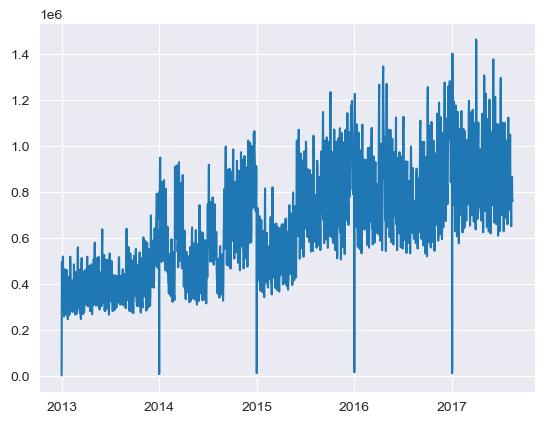

In [27]:
sales_over_time = train.groupby('date')['sales'].sum()
plt.plot(sales_over_time)
plt.show()

In [28]:
train["day"] = train["date"].dt.dayofweek
daily_sales = train.groupby("day")["sales"].sum()

## reduce train.csv file to 4000000 row

In [34]:
train_df = train[:200000]
train_df.to_csv('train_reduced.csv', index=False)